<a href="https://colab.research.google.com/github/barauna-lo/Colored_Noise/blob/main/RNN_PLOTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Main Goals

1. What is the best RNN cell to predeict Colored noise?
2. What is the best hyperparameters configuration for each cell?
3. Is the `mse` the best loss function? Can we inplement the $\beta$ long term analyse? 
4. What about `deepAR`, `Arima`, `Prophet`, [`WaveNet`](https://homl.info/wavenet) and `Transformer`?
5. What about [`LSTMAutoencoder`](https://www.youtube.com/watch?v=6S2v7G-OupA)? 
6. Explore several hyperparamntes using [OPTUNA](https://optuna.org/)
 * Number of layers 
 * Number of Neurons
 * Activation functions

# Some questions:

*  Is the `look_back` to long? Add inicial 1D convolutional layer?
*  

# Doctor Sauter Sugestions 

* Make the prediction the FFT signal

# Librarys

In [ ]:
import numpy as np
import pandas as pd
#import math
import matplotlib.pyplot as plt
#import tensorflow as tf

#from keras import Sequential, models
#from keras.layers import Conv2D, Flatten, Dense, LSTM, GRU, RNN,SimpleRNN, InputLayer,Conv1D, add, Reshape, Flatten
#from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
#from sklearn.metrics import mean_squared_error
#from sklearn import preprocessing
#from datetime import datetime # for put the time info in each plot          #https://stackoverflow.com/questions/415511/how-to-get-the-current-time-in-python
#import time as time

## Ploting

In [ ]:
df = pd.read_pickle('color_4series.plk')

# Parametes

In [ ]:
# index = [0,4,9]
# color = ['black','pink','red']
# linewidth = [0.07,0.5,.5]
# plt.figure(figsize=(20,4),dpi=100)
# for i in range(len(index)):
#   plt.subplot(1,3,i+1)
#   plt.plot(df.Series[index[i]][:],label='β ='+str(df.beta[index[i]]),color=color[i],linewidth=linewidth[i])
#   plt.grid()
#   plt.legend()
#   plt.xlabel('$t$')
# plt.ylabel('Amplitude')
#   #plt.title(color[i]+ ' noise')
# #plt.suptitle('Colored Noise')


# Pre-processing

In [ ]:
# #serie_index = 0  #white Noise
# #serie_index = 4 #pink noise
# serie_index = 9#red Noise

# min_size , max_size = 0 , len(df.Series[0])

# dataframe = pd.DataFrame({"Serie":df['Series'][serie_index][min_size:max_size]})
# dataset = dataframe.values.astype('float32')
# beta = str(df['beta'][serie_index])

In [ ]:
# # definindo as amostras de treinamento e teste segundo o hold-out.
# train_size = int(len(dataset) * 0.50)
# test_size = len(dataset) - train_size
# train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
# conversão da série temporal em uma matriz de atributos para regressão
def create_dataset(dataset, look_back=10):
	'''
  This function will contain two vectors, dataX and dataY, the dataX will contain a set of numbers within the time series
  and the dataY will be its posterior value
  For example:
  list = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
  if the look_back is equal to 3 we will have
  dataX[0] = [0,1,2] ; dataY[0] = [3]
  dataX[1] = [1,2,3] ; dataY[1] = [4]
  dataX[2] = [2,3,4] ; dataY[2] = [5]
  dataX[3] = [3,4,5] ; dataY[3] = [6]
	'''
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
look_back = 2**10

trainX, trainY = create_dataset(train, look_back)
testX, testY   = create_dataset(test,  look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX,(trainX.shape[0],1, trainX.shape[1]))
testX =  np.reshape(testX, (testX.shape[0],1, testX.shape[1]))
#valX =   np.reshape(valX,  (valX.shape[0],  1, valX.shape[1]))

# Model

In [ ]:
#Setting Random seeds🌱
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(3)

In [ ]:
#Paramenters 
epochs = 100
batch_size = 256#len(trainX)# 256#
model_code = 'WNET_64n'#All_layers_Bacth256'
n_1 = 64#10#int(look_back*100)
n_2 = 64#int(look_back*100)
n_3 = 64 #int(look_back*1e-1)
n_4 = 64#10#int(look_back*1e-1)

In [ ]:
#Alocationg all the models in vectors!
model = [0,1,2]
# model = [model_RNN,model_LSTM,model_GRU,model_WNET]
# history = [history_RNN,history_LSTM,history_GRU,history_WNET]
model_name = ['Simple RNN','LSTM','GRU','Wave Net']
color = ['C0','C1','C2','magenta']

# #Allocating metrics
# loss, mse, val_loss =[],[],[]
# for i in range(len(model)):
#   loss.append(history[i].history['loss'])
#   mse.append(history[i].history['mse'])
#   val_loss.append(history[i].history['val_loss'])

In [ ]:
model_code = 'PLOTS'
df_loss0 = pd.read_csv(f"b0/1_loss_b0.csv")
df_loss1 = pd.read_csv(f"b1/1_loss_b1.csv")
df_loss2 = pd.read_csv(f"b2/1_loss_b2.csv")
model = [0,1,2]


In [ ]:
size = 15

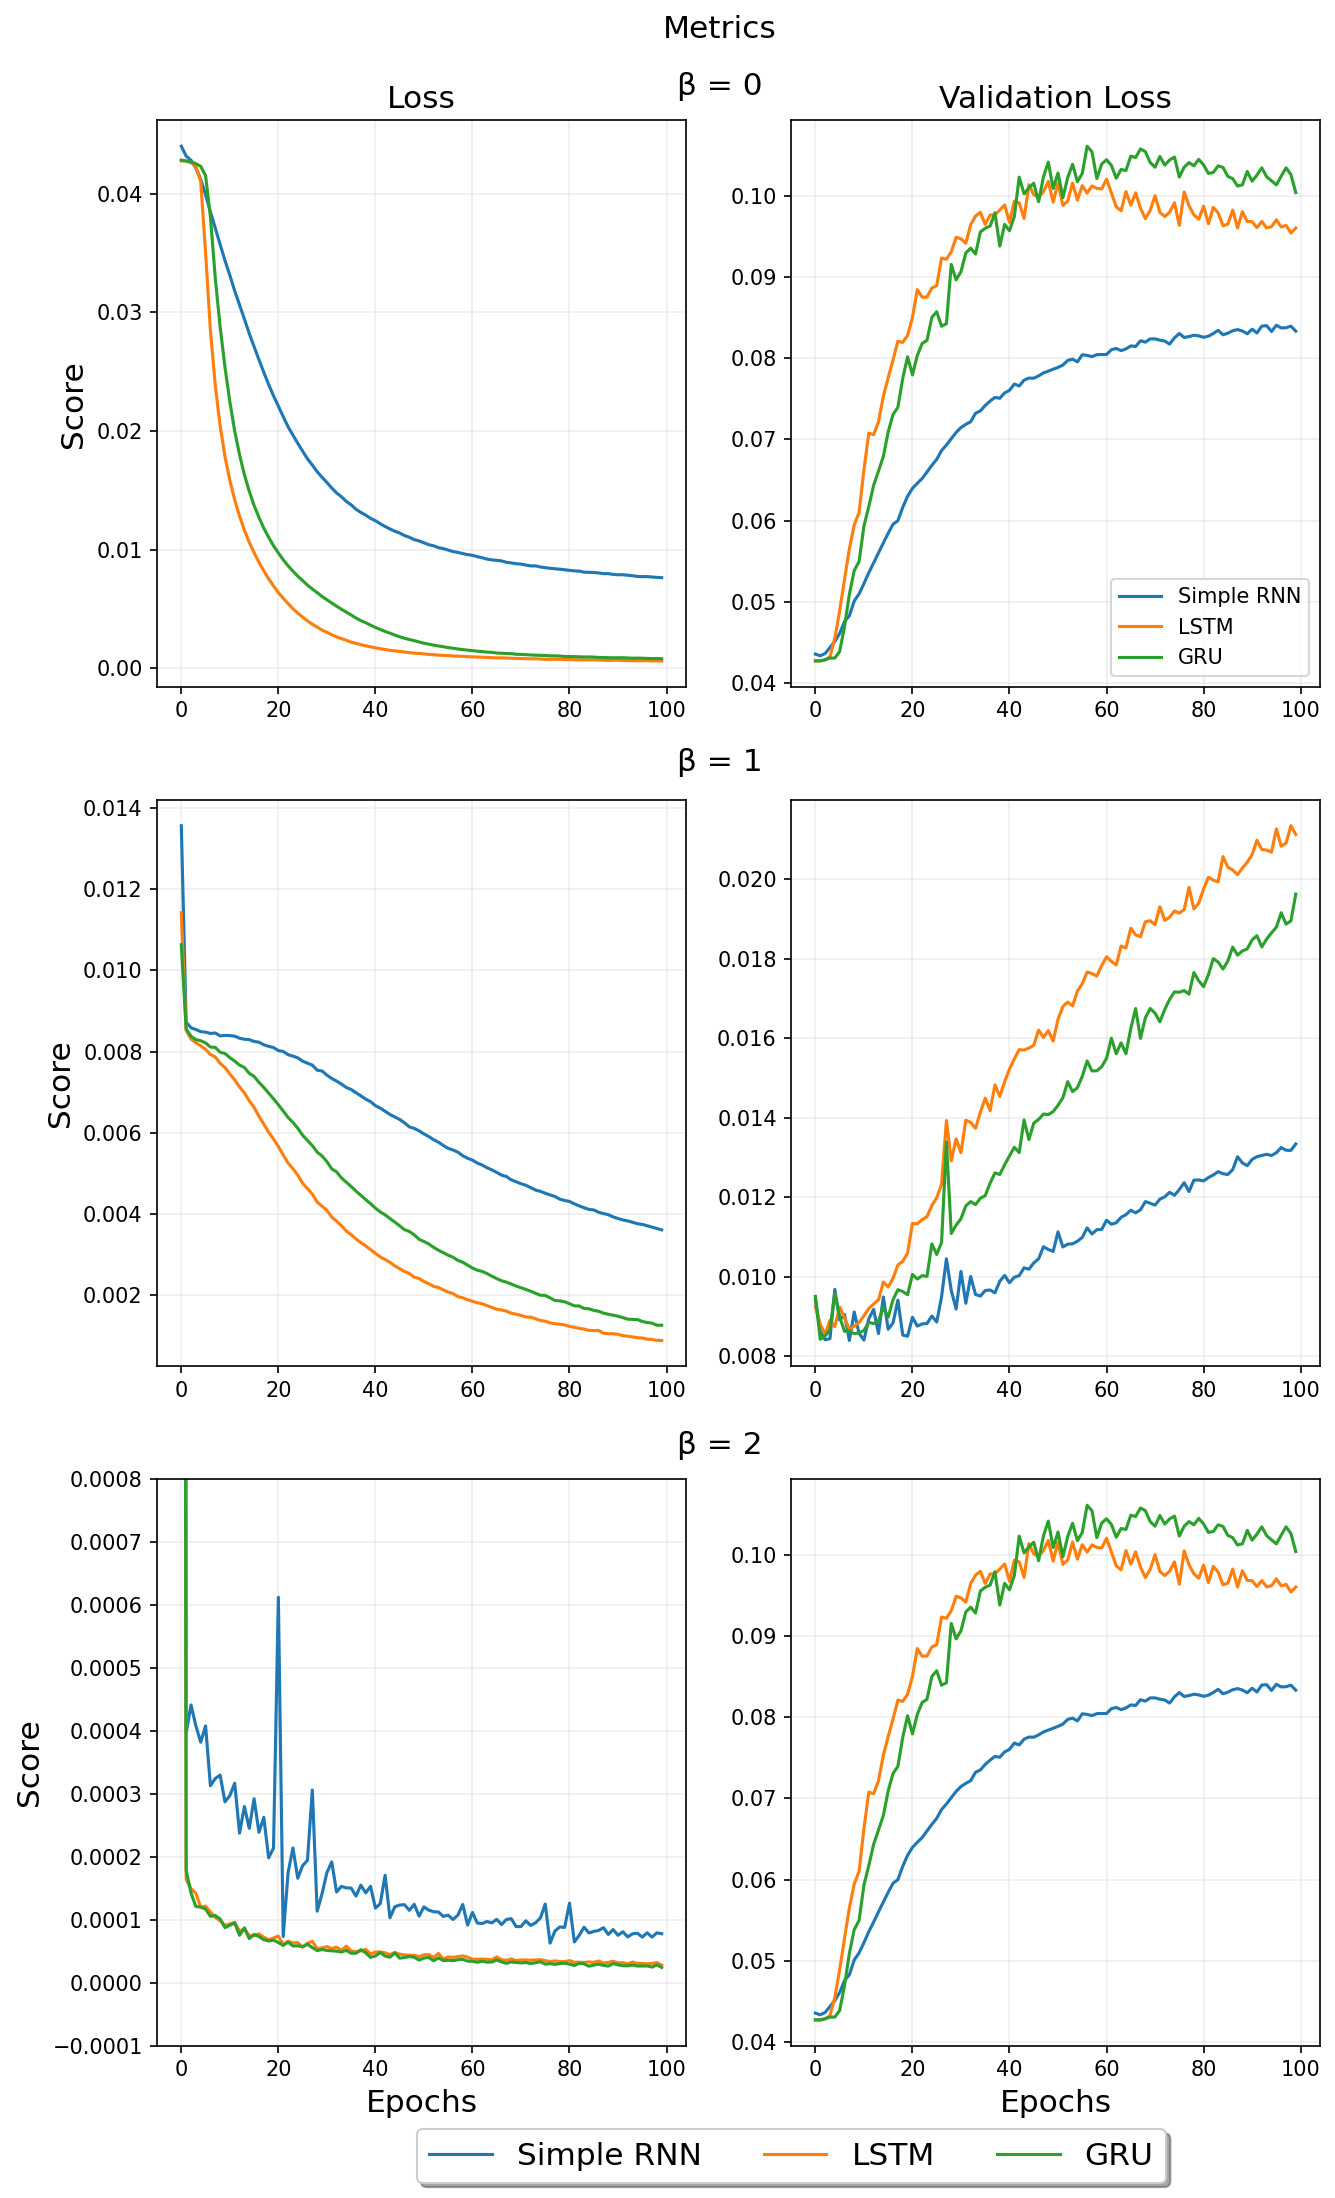

In [ ]:
size = 15
fig = plt.figure(figsize=(10, 17),dpi=150)

plt.subplot(3,2,1)
for i in range (0,3): plt.plot(df_loss0[df_loss0.columns[0]],
                               df_loss0[df_loss0.columns[1+i]], label=model_name[i],  color=color[i], linestyle='-')
#plt.xlabel('Epochs',size=size)
plt.ylabel('Score',size=size)
#plt.legend()
plt.title('Loss',size=size)
#plt.ylim(-0.01,0.2)
plt.grid(alpha=0.2)

plt.subplot(3,2,2)
for i in range (4,7): plt.plot(df_loss0[df_loss0.columns[0]],
                               df_loss0[df_loss0.columns[1+i]], label=model_name[i-4],  color=color[i-4], linestyle='-')
#plt.xlabel('Epochs',size=size)
#plt.ylabel('Score',size=size)
plt.legend()
plt.title('Validation Loss',size=size)
#plt.ylim(-0.01,0.2)
plt.grid(alpha=0.2)



plt.subplot(3,2,3)
for i in range (0,3): plt.plot(df_loss1[df_loss1.columns[0]],
                               df_loss1[df_loss1.columns[1+i]], label=model_name[i],  color=color[i], linestyle='-')
#plt.xlabel('Epochs',size=size)
plt.ylabel('Score',size=size)
#plt.legend()
#plt.title('Loss',size=size)
#plt.ylim(-0.01,0.2)
plt.grid(alpha=0.2)

plt.subplot(3,2,4)
for i in range (4,7): plt.plot(df_loss1[df_loss1.columns[0]],
                               df_loss1[df_loss1.columns[1+i]], label=model_name[i-4],  color=color[i-4], linestyle='-')
#plt.xlabel('Epochs',size=size)
#plt.ylabel('Score',size=size)
#plt.legend()
#plt.title('Validation Loss',size=size)
#plt.ylim(-0.01,0.2)
plt.grid(alpha=0.2)



plt.subplot(3,2,5)
for i in range (0,3): plt.plot(df_loss2[df_loss2.columns[0]],
                               df_loss2[df_loss2.columns[1+i]], label=model_name[i],  color=color[i], linestyle='-')
plt.xlabel('Epochs',size=size)
plt.ylabel('Score',size=size)

#plt.title('Loss',size=size)
plt.ylim(-0.0001,0.0008)
plt.grid(alpha=0.2)

plt.subplot(3,2,6)
for i in range (4,7): plt.plot(df_loss0[df_loss0.columns[0]],
                               df_loss0[df_loss0.columns[1+i]], label=model_name[i-4],  color=color[i-4], linestyle='-')
plt.xlabel('Epochs',size=size)

#plt.ylabel('Score',size=size)
#plt.legend()
#plt.title('Validation Loss',size=size)
#plt.ylim(-0.01,0.2)
plt.grid(alpha=0.2)
plt.legend(loc='lower center', bbox_to_anchor=(0, -0.27),
          ncol=3, fancybox=True, shadow=True,prop={'size': size})


plt.suptitle('Metrics',  y=0.91, horizontalalignment='center', verticalalignment='bottom', fontsize = size)
plt.text(0.5, 0.89,  'β = 0', transform=fig.transFigure, horizontalalignment='center',size = size)
plt.text(0.5, 0.625, 'β = 1', transform=fig.transFigure, horizontalalignment='center',size = size)
plt.text(0.5, 0.357, 'β = 2', transform=fig.transFigure, horizontalalignment='center',size = size)

plt.savefig(f'1_Metrics.pdf',bbox_inches='tight')

#plt.savefig(f'1_Metrics__MWAVENET.pdf',bbox_inches='tight')


### Alocation Dataframe

In [ ]:
# 🐼🐼🐼🐼🐼🐼 ALOCATING THIS DATA IN A DATAFRAME 🐼🐼🐼🐼🐼🐼🐼
# df_predict = pd.DataFrame()
# df_predict.insert(0,'dataset',dataset.reshape(len(dataset),))
# for i in range(len(model)): df_predict.insert(1+i,'train_'+model_name[i],trainPredictPlot[i]) #Alocando as séries    
# for i in range(len(model)): df_predict.insert(len(df_predict.columns),'vall_'+model_name[i],testPredictPlot[i])
# for i in range(len(model)): df_predict.insert(len(df_predict.columns),'all_'+model_name[i],model_data[i])
# df_predict.to_csv(f"2_predict_b{beta}.csv", index=False)

df_predict = []

for beta in range(0,3): df_predict.append(pd.read_csv(f"b{beta}/2_predict_b{beta}.csv"))

In [ ]:
def plot(a,b,c,beta):
    if   beta == 0: df_color = 'black'
    elif beta == 1: df_color = 'magenta'
    else          : df_color = 'red'

    if   beta == 0: xlabel = 'Amplitude(t)'
    elif beta == 1: xlabel = None
    else          : xlabel = None
        
    if   i == 0: ylabel = None
    elif i == 1: ylabel = None
    else       : ylabel = 'Samples (time-steps)'
         
    grossura = 0.2 if beta == 0 else 0.4
        
    #plt.subplot(len(model),1,(i+1))
    plt.plot(a,label="Original Data Set",color = df_color,linewidth=grossura   )
    plt.plot(b,label='Train'            ,color ='C0'     ,linewidth=grossura   )
    plt.plot(c,label='Validation'       ,color ='C1'     ,linewidth=grossura   )
    plt.title(f'β = {beta}\n'+str(model_name[i])if i ==0 else str(model_name[i]),size=size)
    plt.ylabel(xlabel,size=size)
    plt.xlabel(ylabel,size=size)
    plt.grid(alpha=0.5)

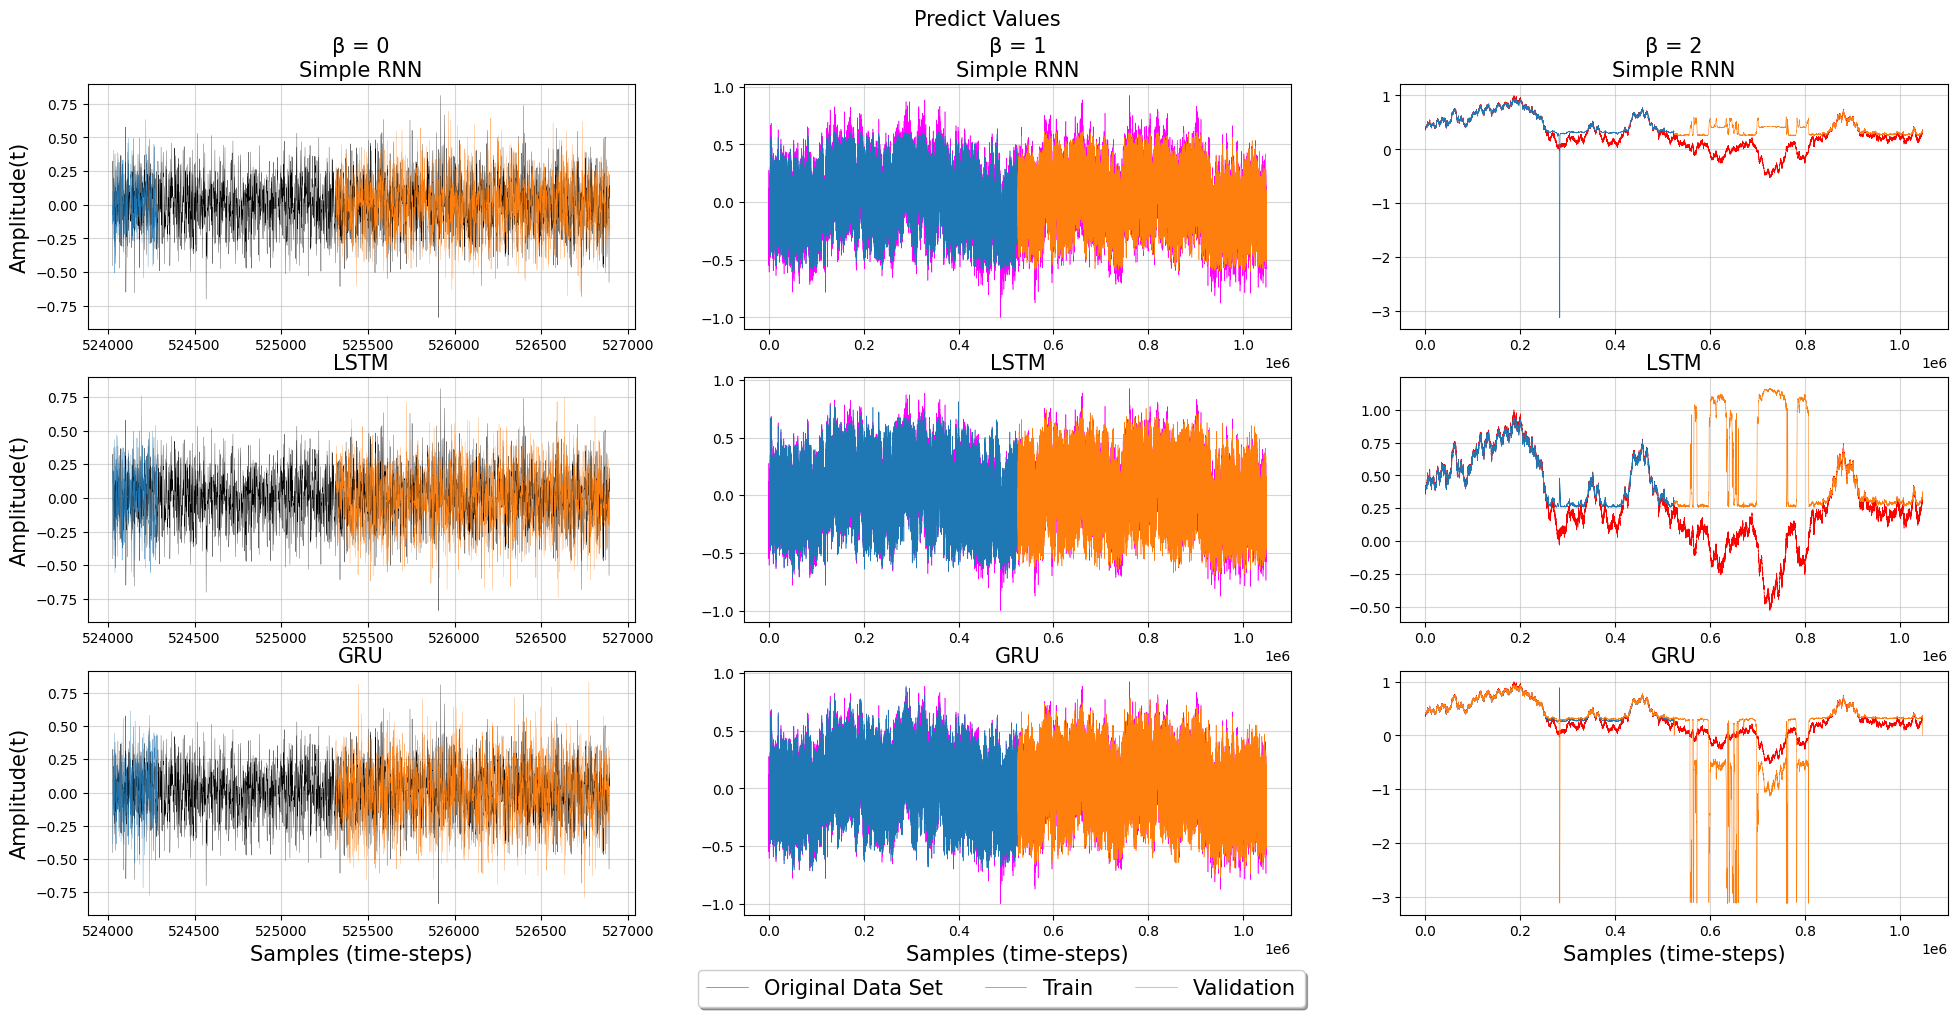

In [ ]:


plt.figure(figsize = (24,4*len(model)-1), dpi=100)
plt.suptitle('Predict Values',  y=0.93, horizontalalignment='center', verticalalignment='bottom', fontsize = size)
for beta in range(0,3):
    for i in range(len(model)):
        plt.subplot(len(model),3,(beta+i*3+1))

        if  beta == 0: 
            mini = int(len(dataset)/2.001)
            maxi = int(-len(dataset)/2.01)
        elif beta == 1: mini = maxi = None
        else          : mini = maxi = None
            
        plot(df_predict[beta]['dataset'][mini:maxi],
           df_predict[beta][df_predict[beta].columns[i+1]][mini:maxi],
           df_predict[beta][df_predict[beta].columns[i+5]][mini:maxi],beta)    
    
plt.legend(loc='lower center', bbox_to_anchor=(-0.73, -0.42),
           ncol=3, fancybox=True, shadow=True,prop={'size': size}) 

plt.savefig(f'2_Predict.pdf',bbox_inches='tight')

plt.show()

## Auto Prediction 

Now we will create a function to automatica generate new data. The model will predeict a value and the will add this value in the incial vector to be predict and erase the incial point

```
x = [1,2,3,4]
y = model.predic(x) # y = 5
x.append(y)
x = x[1:] 
x = [2,3,4,5]
```

the we star again saving all values of `y`



In [ ]:
df_autogen = []
for beta in range(0,3): df_autogen.append(pd.read_csv(f"b{beta}/3_autogen_b{beta}.csv"))

In [ ]:
def plot_auto(a,beta):
    if   beta == 0: df_color = 'black'
    elif beta == 1: df_color = 'magenta'
    else          : df_color = 'red'

    if   beta == 0: xlabel = 'Amplitude(t)'
    elif beta == 1: xlabel = None
    else          : xlabel = None
        
    if   i == 0: ylabel = None
    elif i == 1: ylabel = None
    else       : ylabel = 'Samples (time-steps)'
         
    grossura = 0.2 if beta == 0 else 0.4
        
    #plt.subplot(len(model),1,(i+1))
    plt.plot(a,color=color[i])
    plt.axvline(x=look_back,linestyle='--',c='b',label='Cutoff')
    plt.title(f'β = {beta}\n'+str(model_name[i])if i ==0 else str(model_name[i]),size=size)
    plt.ylabel(xlabel,size=size)
    plt.xlabel(ylabel,size=size)
    plt.grid(alpha=0.5)

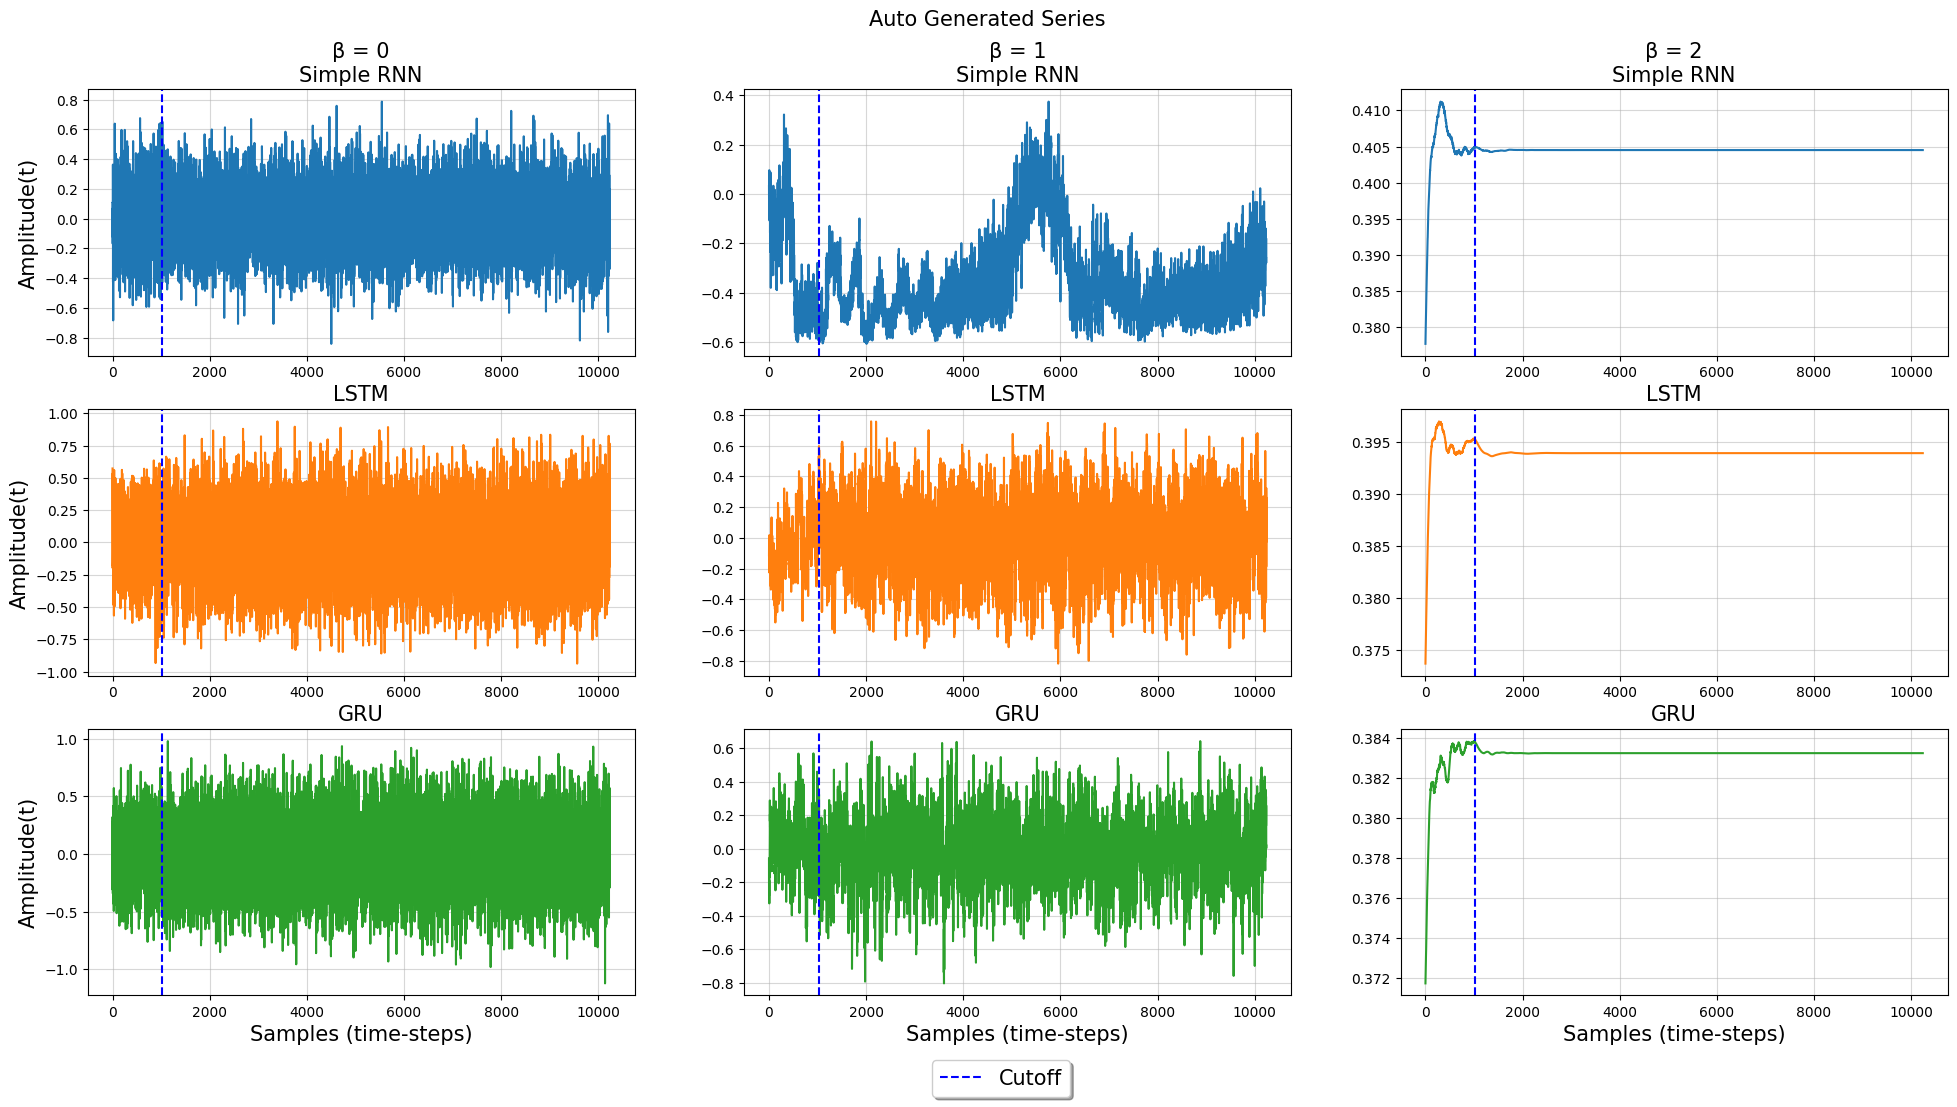

In [ ]:
look_back = 1024
size = 15
plt.figure(figsize = (24,4*len(model)), dpi=100)
plt.suptitle('Auto Generated Series',  y=0.93, horizontalalignment='center', verticalalignment='bottom', fontsize = size)
for beta in range(0,3):
    for i in range(len(model)):
        plt.subplot(len(model),3,(beta+i*3+1))
        plot_auto(df_autogen[beta][df_autogen[beta].columns[i]][:].values,beta)
        plt.grid(alpha=0.5)
        
plt.legend(loc='lower center', bbox_to_anchor=(-0.73, -0.42),
           ncol=3, fancybox=True, shadow=True,prop={'size': size})   
plt.savefig('3_AutoGen.pdf',bbox_inches='tight')  
plt.show()  

## SpecPlus

Generation of the Power Spectrum of a time series

In [ ]:
def specplus(nomeArquivo,
             INICIO=10,
             FIM=6300, 
             textoTituloPSD = r'Original Time Series - ',
             corPSD2 =  'navy',
             xlabel='Frequency (Hz)', 
             ylabel='PSD',
             size  ='10'):
    #FIM = 2**int(np.log2(len(trainPredict[i]))-1)
    import matplotlib.pyplot as plt
    import matplotlib.mlab as mlab
    from scipy import stats, optimize
    import numpy as np
    import math
 
    #---------------------------------------------------------------------
    # Calcula o PSD da série temporal
    #---------------------------------------------------------------------

    def psd(data):
        """Calcula o PSD de uma série temporal."""
        # Define um intervalo para realizar o ajuste da reta
        # INICIO = 15
        # FIM = 6300
        # O vetor com o tempo é o tamanho do número de pontos
        N = len(data)#int(len(data)/2)
        tempo = np.arange(len(data))
        # Define a frequência de amostragem
        dt = (tempo[-1] - tempo[0] / (N - 1))
        fs = 1 / dt
        # Calcula o PSD utilizando o MLAB
        power, freqs = mlab.psd(data, Fs = fs, NFFT = N, scale_by_freq = False)
        # Calcula a porcentagem de pontos utilizados na reta de ajuste
        totalFrequencias = len(freqs)
        totalPSD = FIM - INICIO
        porcentagemPSD = int(100 * totalPSD / totalFrequencias)
        # Seleciona os dados dentro do intervalo de seleção
        xdata = freqs[INICIO:FIM]
        ydata = power[INICIO:FIM]
        # Simula o erro
        yerr = 0.2 * ydata
        # Define uma função para calcular a Lei de Potência
        powerlaw = lambda x, amp, index: amp * (x**index)
        # Converte os dados para o formato LOG
        logx = np.log10(xdata)
        logy = np.log10(ydata)
        # Define a função para realizar o ajuste
        fitfunc = lambda p, x: p[0] + p[1] * x
        errfunc = lambda p, x, y, err: (y - fitfunc(p, x)) / err    
        logyerr = yerr / ydata
        # Calcula a reta de ajuste
        pinit = [1.0, -1.0]
        out = optimize.leastsq(errfunc, pinit, args = (logx, logy, logyerr), full_output = 1)    
        pfinal = out[0]
        covar = out[1]
        index = pfinal[1]
        amp = 10.0 ** pfinal[0]
        indexErr = np.sqrt(covar[0][0])
        ampErr = np.sqrt(covar[1][1]) * amp
        # Retorna os valores obtidos
        return freqs, power, xdata, ydata, amp, index, powerlaw, INICIO, FIM

    def main():
        """Função com o código principal do programa."""
        #print("\nSpectral Analysis for time series...\n")
        # Desabilita as mensagens de erro do Numpy (warnings)
        old_settings = np.seterr(divide = 'ignore', invalid = 'ignore', over = 'ignore')
        # Carrega o arquivo de dados
        #nomeArquivo = 'serie1.txt'     

        pd.DataFrame(nomeArquivo[:2**int(np.log2(len(nomeArquivo)))]).to_csv("data.csv", index=False, header=False)
        #pd.DataFrame(model_data[0][:2**int(np.log2(len(model_data)))]).to_csv("model.csv", index=False, header=False)

        #csv_para_txt
        import csv
        with open("data.txt", "w") as my_output_file: 
            with open("data.csv", "r") as my_input_file: [ my_output_file.write(" ".join(row)+'\n') for row in csv.reader(my_input_file)]
            my_output_file.close()

        data = np.genfromtxt('data.txt',
                             delimiter = ',',
                             dtype = 'float32',
                             filling_values = 0)

        # Exibe os primeiro N valores do arquivo
        #N = 10
        #fig = plt.figure(figsize=(6,4), dpi=100)
        #fig.subplots_adjust(hspace = .4, wspace = .2)
        # Tamanho das fontes
        tamanhoFonteEixoX     = 16
        tamanhoFonteEixoY     = 20
        tamanhoFonteTitulo    = 16
        tamanhoFontePrincipal = 25
        # Título principal
        tituloPrincipal = 'Time Series Spectral Analysis'   
        #-----------------------------------------------------------------
        # Plotagem da série original
        #-----------------------------------------------------------------
        # Define as cores da plotagem
        #corSerieOriginal = cor# 'r'
        # Título dos eixos da série original
        textoEixoX = 'Time'
        textoEixoY = 'Amplitude'
        #textoTituloOriginal = titulo

        #-----------------------------------------------------------------
        # Cálculo e plotagem do PSD                                     --
        #-----------------------------------------------------------------
        # Calcula o PSD
        freqs, power, xdata, ydata, amp, index, powerlaw, INICIO, FIM = psd(data)
        # O valor do beta equivale ao index
        b = index
        # Define as cores da plotagem
        corPSD1 = 'k'
        #corPSD2 =  'orange' if modelo_nome == 'GRU' else 'green'
        #corPSD2 =  'navy'# if nomeArquivo == 'serie_time.txt' else 'orange' if modelo_nome == 'GRU' else 'green'
        # Título dos eixos do PSD
        textoPSDX = xlabel
        textoPSDY = ylabel
        #textoTituloPSD = r''+str(modelo_nome)+' - PSD Estimation β = '
        # Plotagem do PSD    
        #PSD = fig.add_subplot(2, 2, (1,4))    
        plt.plot(freqs, power, '-', color = corPSD1, alpha = 0.7)
        plt.plot(xdata, ydata, color = corPSD2, alpha = 0.8)
        plt.axvline(freqs[INICIO], color = corPSD2, linestyle = '--')
        plt.axvline(freqs[FIM], color = corPSD2, linestyle = '--')    
        plt.plot(xdata, powerlaw(xdata, amp, index), 'r-', linewidth = 1.5, label = '$%.4f$' %(b))    
        plt.xlabel(textoPSDX, size = size                                )#, fontsize = tamanhoFonteEixoX)
        plt.ylabel(textoPSDY, size = size                                )#, fontsize = tamanhoFonteEixoY)
        plt.title(textoTituloPSD + ' β = %.4f' %(b), loc = 'center', fontsize = size)
        plt.yscale('log')
        plt.xscale('log')
        plt.grid() 
        #fig.set_size_inches(7, 4)
        #plt.savefig(nomeImagem, dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)    
        #plt.show()

    if __name__ == "__main__":
        main()
    #——————————————————————————————————————————

NameError: name 'df_predict' is not defined

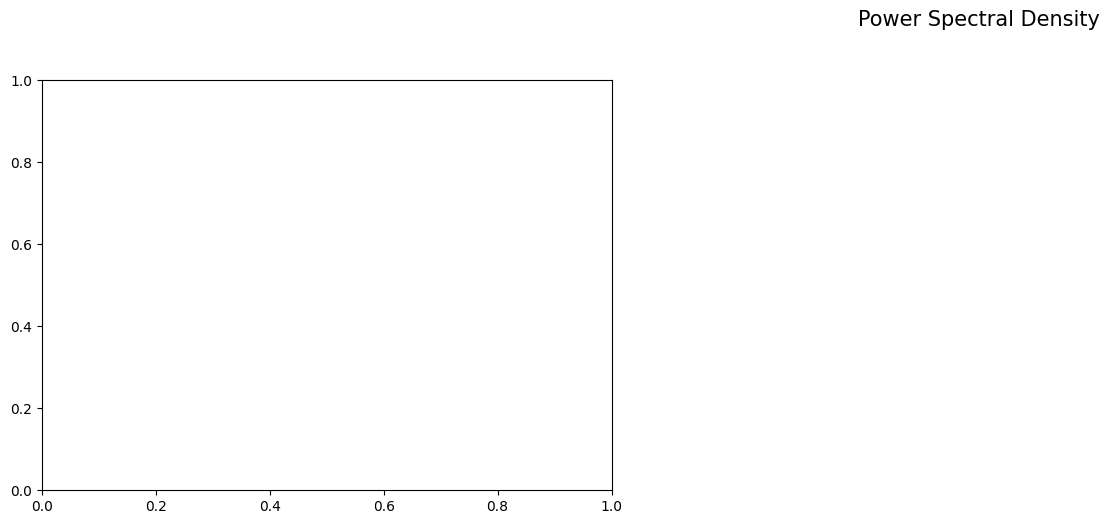

In [ ]:

color_new = ['red','C0', 'C1', 'C2', 'magenta']
model_name_new = ['Original Data Set','Simple RNN', 'LSTM', 'GRU', 'Wave Net']
columnss = ['dataset','all_Simple RNN','all_LSTM','all_GRU']
plt.figure(figsize = (25,5*len(model)+10), dpi=100)
plt.suptitle('Power Spectral Density',  y=0.90, horizontalalignment='center', verticalalignment='bottom', fontsize = 15)
for beta in range(0,3):
    for i in range (0,4):
        plt.subplot(4,3,(beta+i*3+1))
        
        if   beta == 0: ylabel = 'PSD'
        elif beta == 1: ylabel = None 
        else          : ylabel = None
            
        if   i == 0: xlabel = None
        elif i == 1: xlabel = None
        else       : xlabel = 'Frequency (Hz)'
 
        specplus(df_predict[beta][columnss[i]],  #Dataframe
           1,              #Incial Value
           2**int(np.log2(len(df_predict[beta][columnss[i]]))-3), #Final Value
           model_name_new[i],   #Chat Tile
           color_new[i],
           ylabel=ylabel,
           xlabel=xlabel,
           size = size)        #Color  

plt.savefig(f'4_PSD.pdf',bbox_inches='tight')
plt.show()

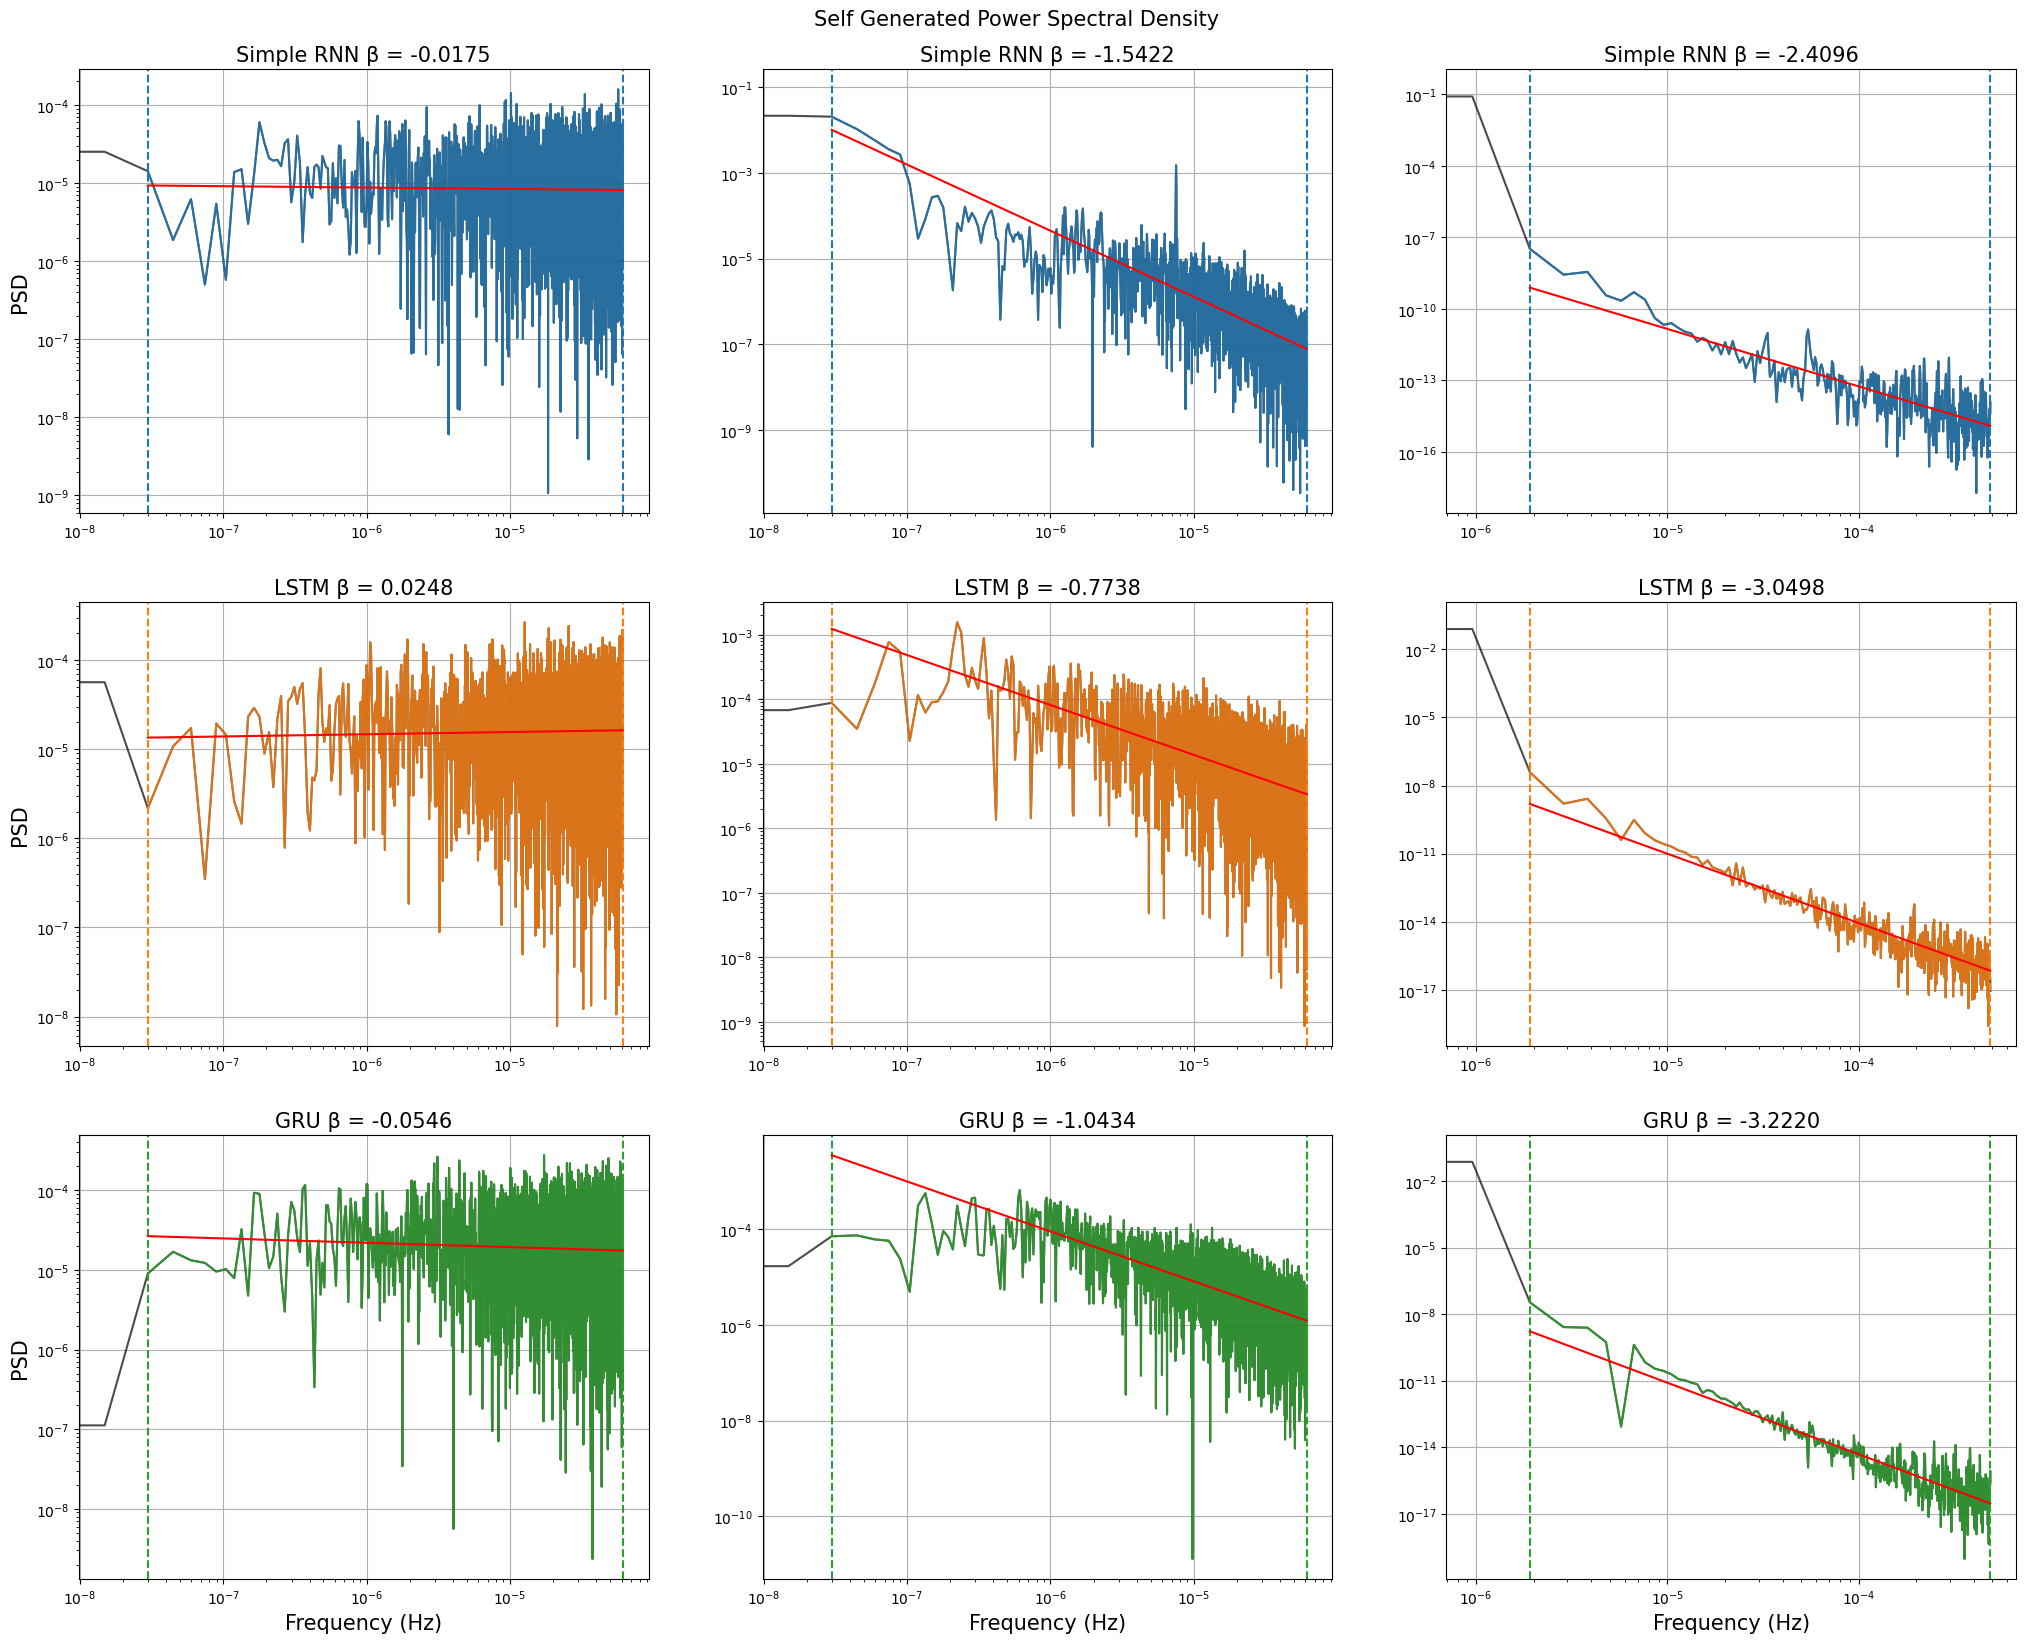

In [ ]:
plt.figure(figsize = (25,5*len(model)+5), dpi=100)
plt.suptitle('Self Generated Power Spectral Density',  y=0.90, horizontalalignment='center', verticalalignment='bottom', fontsize = 15)
for beta in range(0,3):
    for i in range(len(model)):
        plt.subplot(len(model),3,(beta+i*3+1))
        
        if   beta == 0: ylabel = 'PSD'
        elif beta == 1: ylabel = None 
        else          : ylabel = None
            
        if   beta == 0: vai = None
        elif beta == 1: vai = None 
        else          : vai = 2048    
            
        if   i == 0: xlabel = None
        elif i == 1: xlabel = None
        else       : xlabel = 'Frequency (Hz)'
 
        specplus(df_autogen[beta][df_autogen[beta].columns[i]][1024:vai],  #Dataframe
           2,              #Incial Value
           #2**int(np.log2(int(len(df_autogen[df_autogen[beta].columns[i]])/2)-2)), #Final Value      
           2**int(np.log2(len(df_autogen[beta][df_autogen[beta].columns[i]][1024:vai].values))-1), #Final Value
           model_name[i],   #Chat Tile
           color[i],
           ylabel=ylabel,
           xlabel=xlabel,
           size = size)        #Color  

plt.savefig('5_PSD_AutoGen.pdf',bbox_inches='tight')
plt.show()

In [ ]:
#remove all
#!rm *

In [ ]:
#Ziping Data for download📦
#!zip -r /content/drive/MyDrive/Kaggle/model_RNN.zip /content/model_RNN/
#!zip -r /content/drive/MyDrive/INPE/Qualification.zip /content/drive/MyDrive/INPE/Qualification

# References

https://www.tensorflow.org/guide/keras/save_and_serialize

https://medium.com/geekculture/10-hyperparameters-to-keep-an-eye-on-for-your-lstm-model-and-other-tips-f0ff5b63fcd4

https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21

[Prediction and analysis of COVID-19 positive cases using deep learning models: A descriptive case study of India](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7298499/pdf/main.pdf)

[LSTM Models For Univariate Time Series Forecasting](https://github.com/krishnaik06/Time-Series-Forecasting/blob/master/UnivariateTimeSeries.ipynb)

In [ ]:
# end = time.time()

In [ ]:
# print('The entire program was run in\n',round((end-begin)/60/60,4),' hours')

In [ ]:
# del model_RNN
# del model_LSTM
# del model_